<a href="https://colab.research.google.com/github/ndukic/gesture-recognition/blob/master/gesture_recognition_BLE_SENSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow

In [3]:
import pandas as pd

left_data = pd.read_csv('left.csv', header=None).values
right_data = pd.read_csv('right.csv', header=None).values
up_data = pd.read_csv('up.csv', header=None).values
down_data = pd.read_csv('down.csv', header=None).values

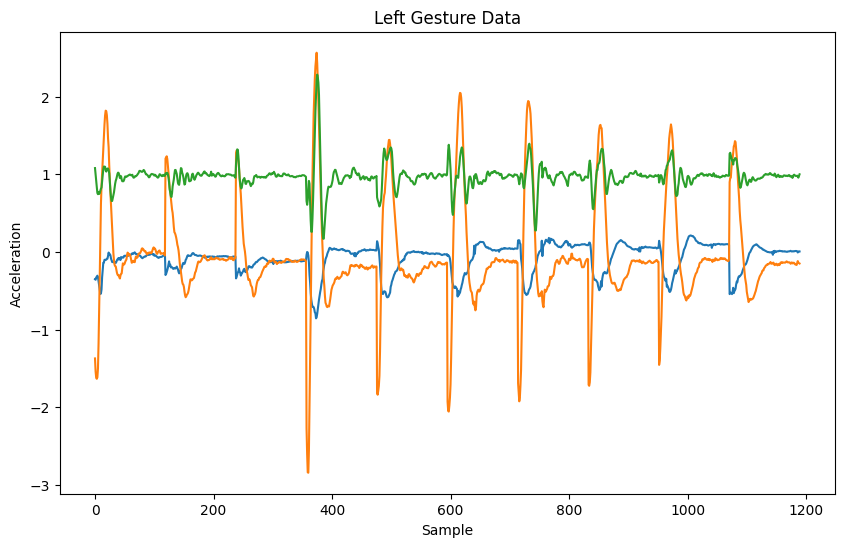

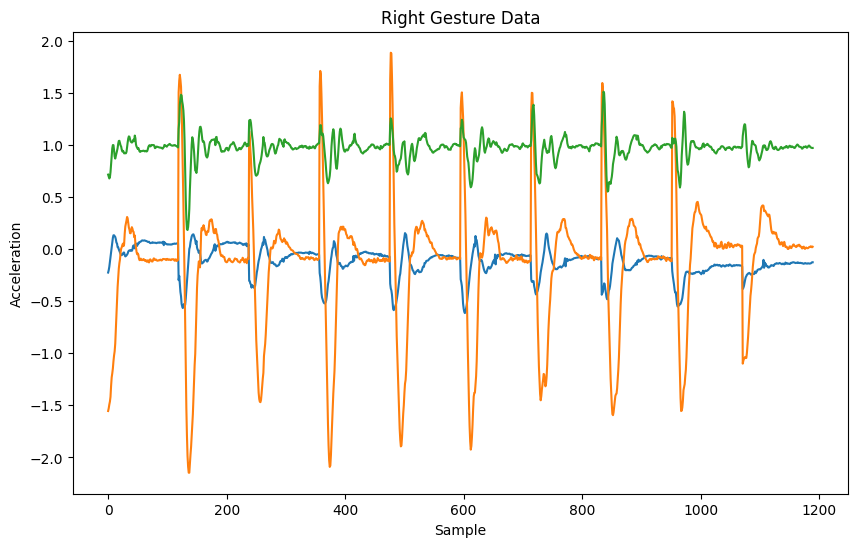

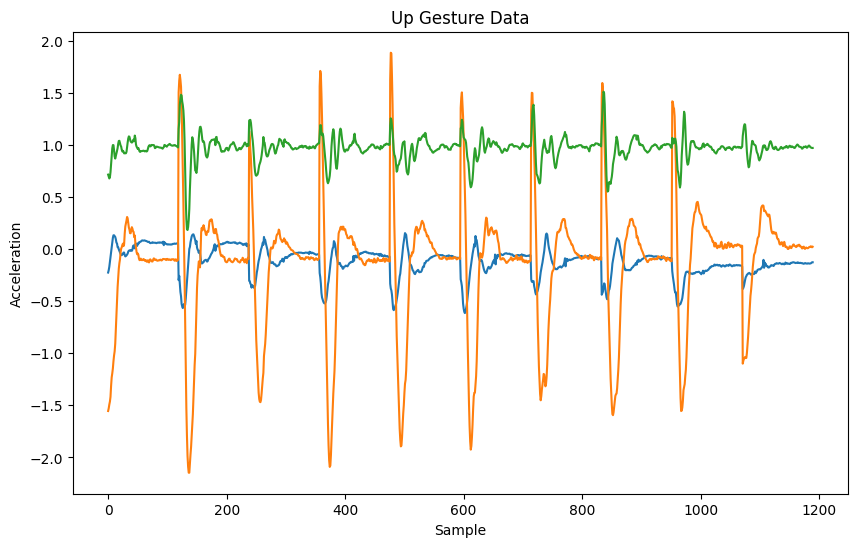

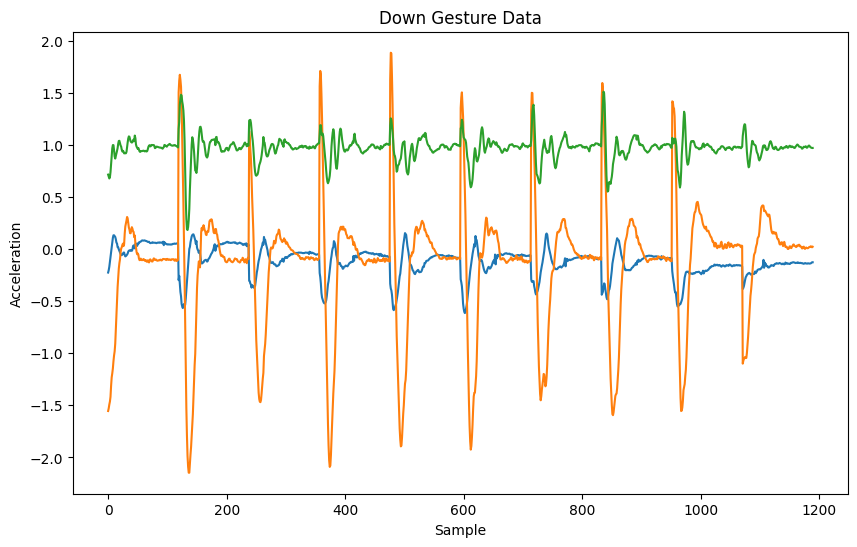

In [4]:
import matplotlib.pyplot as plt

# Plot left gesture data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(left_data)
plt.title('Left Gesture Data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.show()

# Plot right gesture data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(right_data)
plt.title('Right Gesture Data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.show()

# Plot right gesture data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(right_data)
plt.title('Up Gesture Data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.show()

# Plot right gesture data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(right_data)
plt.title('Down Gesture Data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "left",
    "right",
    "up",
    "down",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv(gesture + ".csv", header=None)

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      tensor += [
          (df[0][index] + 4) / 8,
          (df[1][index] + 4) / 8,
          (df[2][index] + 4) / 8
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.12.0

Processing index 0 for gesture 'left'.
	There are 10 recordings of the left gesture.
Processing index 1 for gesture 'right'.
	There are 10 recordings of the right gesture.
Processing index 2 for gesture 'up'.
	There are 10 recordings of the up gesture.
Processing index 3 for gesture 'down'.
	There are 10 recordings of the down gesture.
Data set parsing and preparation complete.


In [6]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [7]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
24/24 [==============================] - 1s 11ms/step - loss: 0.2045 - mae: 0.3816 - val_loss: 0.2139 - val_mae: 0.3968
Epoch 2/600
24/24 [==============================] - 0s 4ms/step - loss: 0.1871 - mae: 0.3686 - val_loss: 0.2292 - val_mae: 0.4016
Epoch 3/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1855 - mae: 0.3664 - val_loss: 0.2313 - val_mae: 0.4030
Epoch 4/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1797 - mae: 0.3587 - val_loss: 0.2458 - val_mae: 0.4080
Epoch 5/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1849 - mae: 0.3583 - val_loss: 0.2203 - val_mae: 0.3973
Epoch 6/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1827 - mae: 0.3621 - val_loss: 0.2239 - val_mae: 0.4009
Epoch 7/600
24/24 [==============================] - 0s 3ms/step - loss: 0.1826 - mae: 0.3589 - val_loss: 0.2198 - val_mae: 0.3984
Epoch 8/600
24/24 [==============================] - 0s 4ms/step - loss: 0.1799 - 

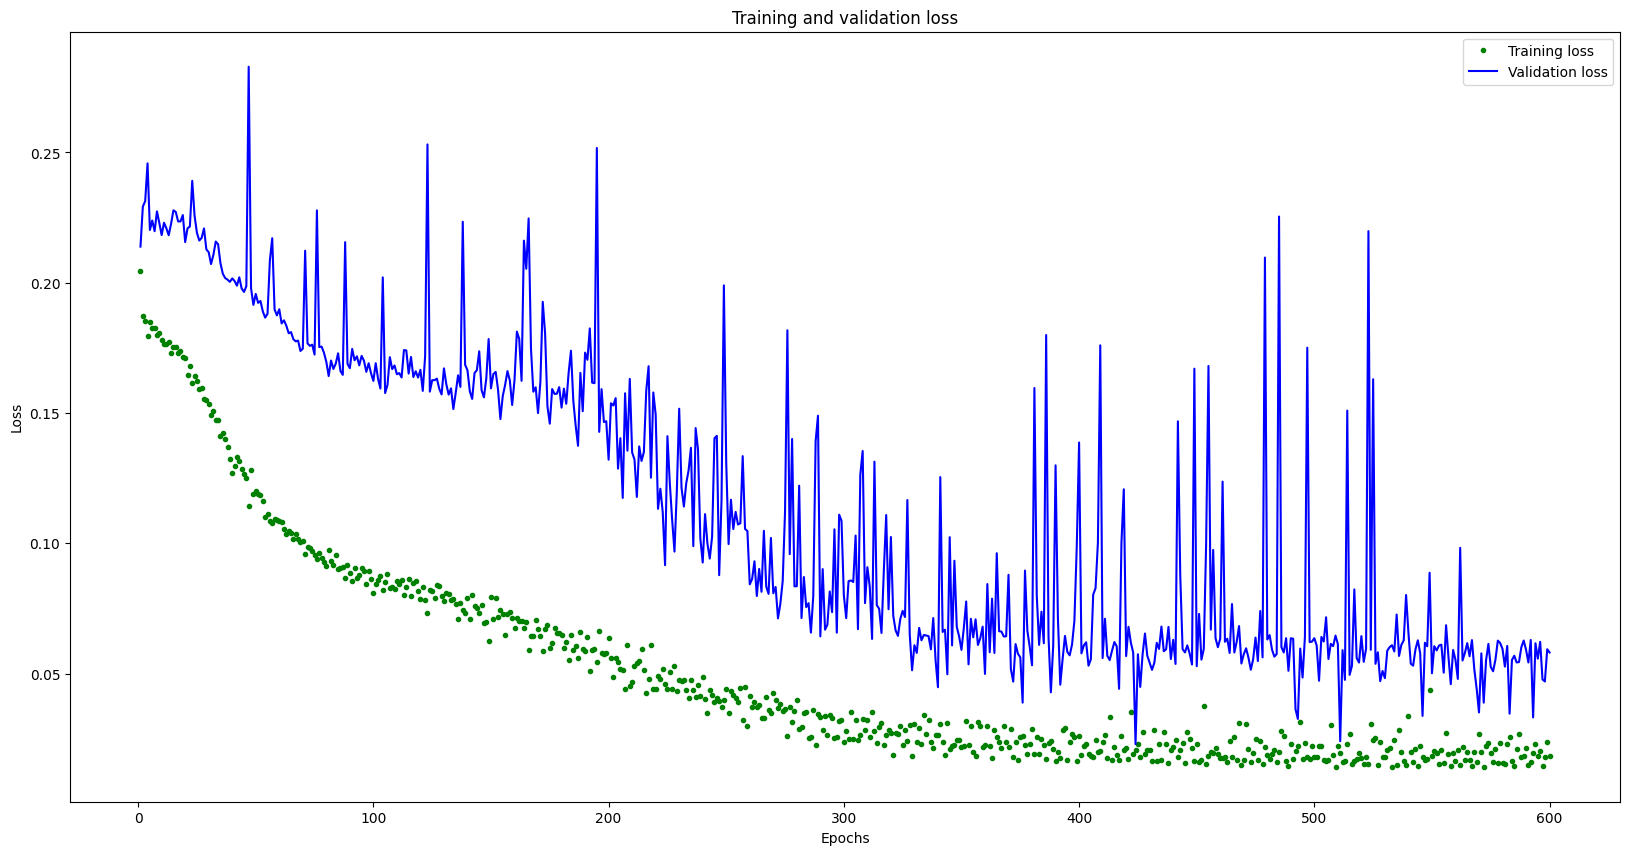

[20.0, 10.0]


In [8]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

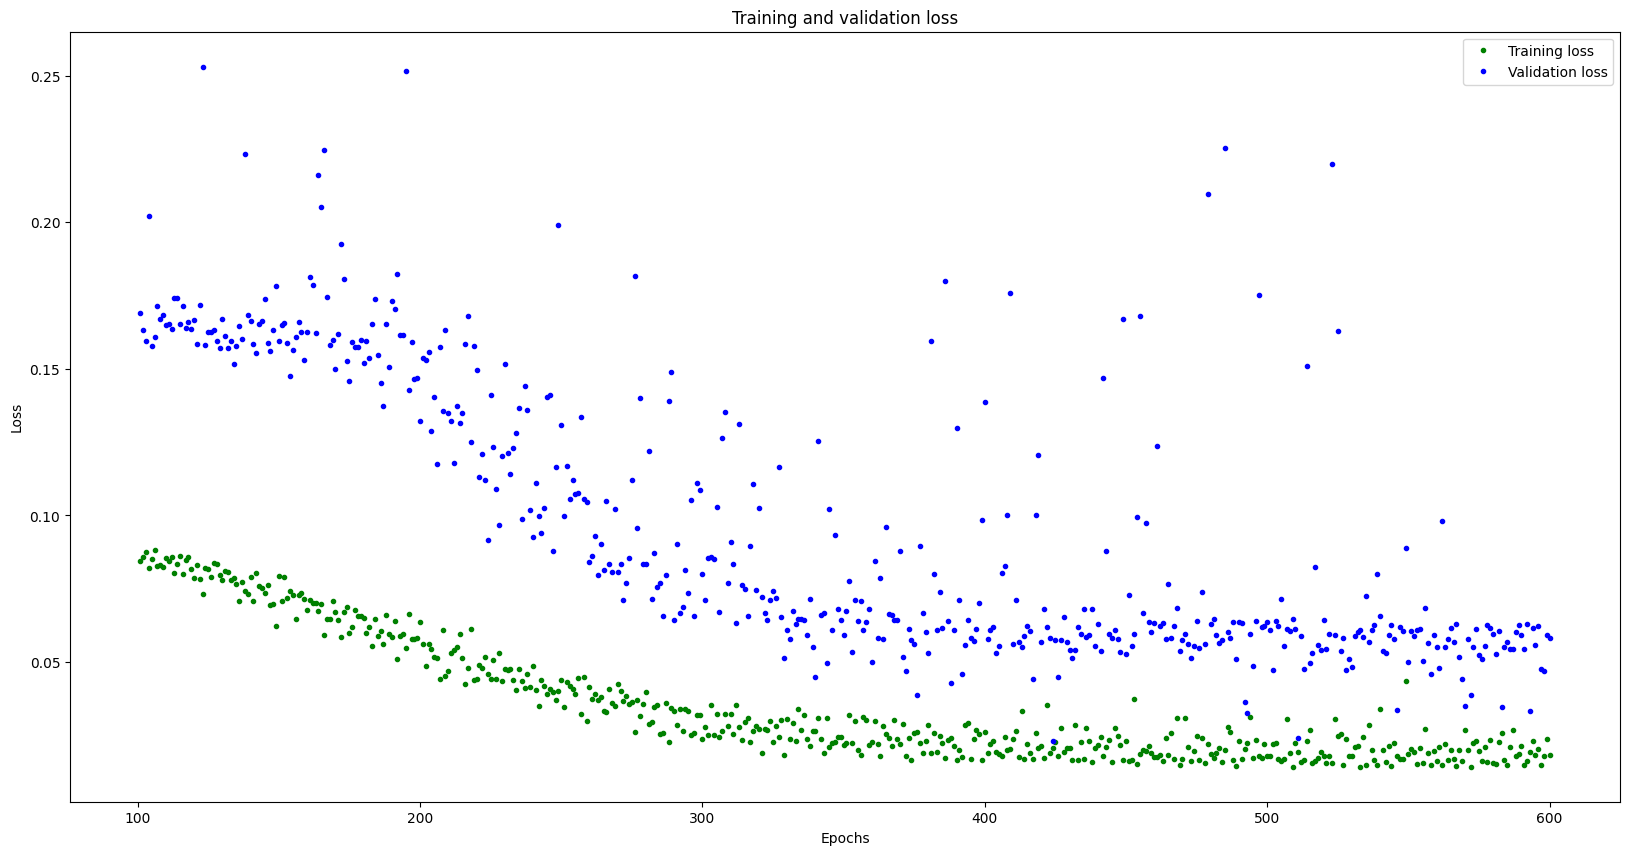

In [9]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

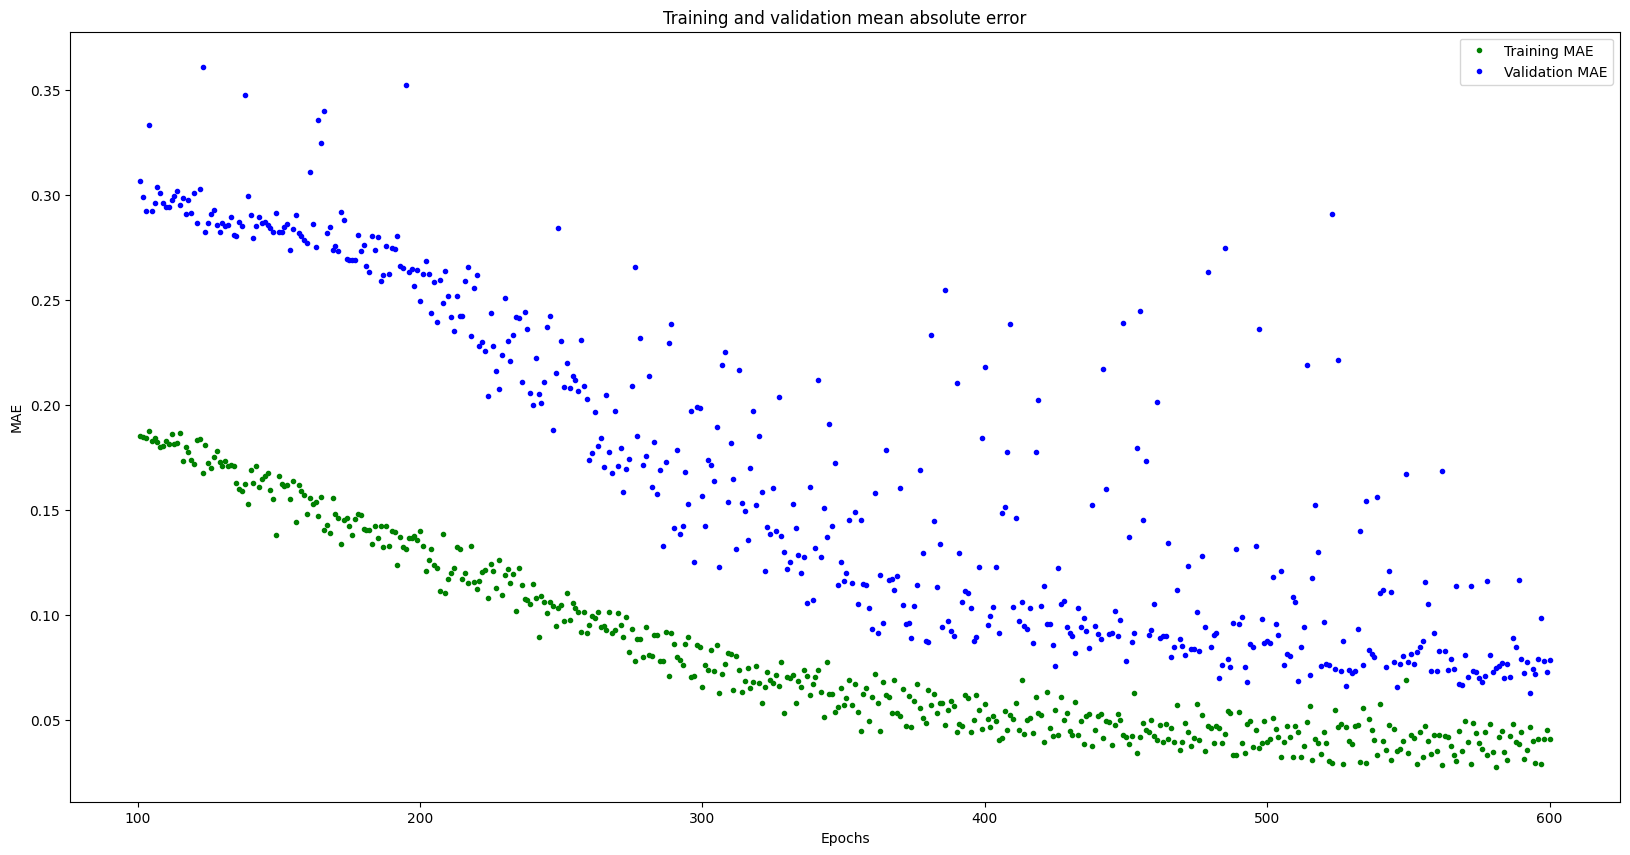

In [10]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

1/1 [==============================] - 0s 178ms/step
predictions =
 [[0.003 0.    0.    0.996]
 [0.278 0.    0.    0.722]
 [0.011 0.037 0.031 0.921]
 [0.    0.001 0.945 0.054]
 [0.004 0.    0.001 0.994]
 [0.001 0.    0.001 0.998]
 [0.    0.002 0.969 0.029]
 [0.998 0.    0.    0.002]]
actual =
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


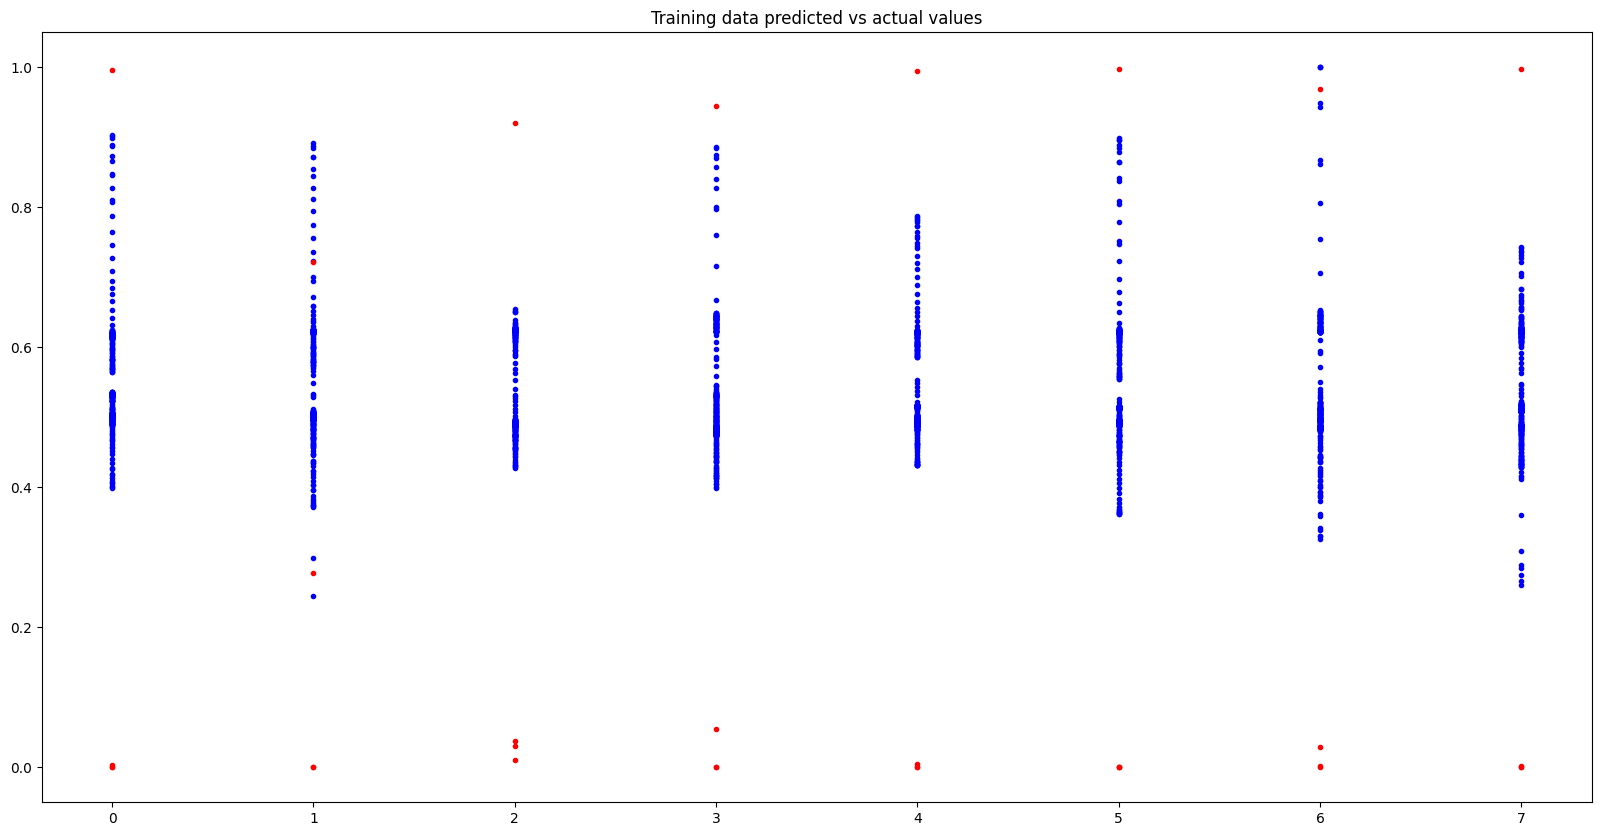

In [11]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, 'b.', label='Actual')
plt.plot(predictions, 'r.', label='Predicted')
plt.show()

In [12]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 77008 bytes


In [13]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 474,918 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


In [15]:
df = pd.read_csv("newsample.csv", header=None)

sample = []
tensor = []
for i in range(119):
  # normalize the input data, between 0 to 1:
  # - acceleration is between: -8 to +8
  tensor += [
      (df[0][i] + 4.0) / 8.0,
      (df[1][i] + 4.0) / 8.0,
      (df[2][i] + 4.0) / 8.0
  ]

# Make the prediction

sample.append(tensor)
sample = np.array(sample)
prediction = model.predict(sample)

# Print the prediction
print(np.round(prediction, decimals=3))

1/1 [==============================] - 0s 21ms/step
[[0.986 0.    0.    0.014]]
